In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential

import pathlib
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
data_dir = r"C:\Users\Alex\Documents\Universidad\7mo Semestre\VA\FPVA\Dataset"
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\Alex\Documents\Universidad\7mo Semestre\VA\FPVA\Dataset


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

86


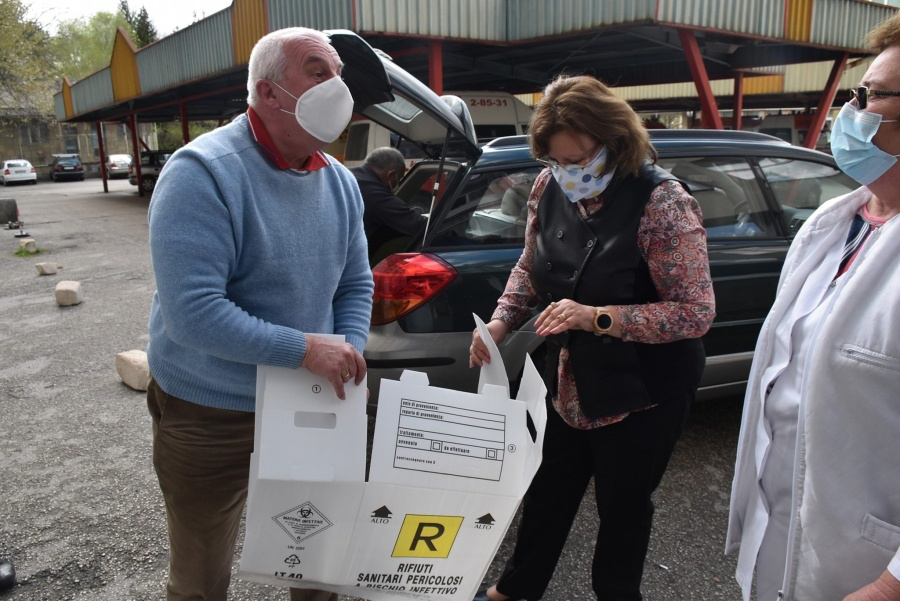

In [6]:
mask = list(data_dir.glob('WM/*'))
PIL.Image.open(str(mask[0]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 110 files belonging to 2 classes.
Using 88 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 110 files belonging to 2 classes.
Using 22 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['WM', 'WoM']


In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [18]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [21]:
epochs = 10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model.summary()

# Guardar el Modelo
model.save('face_detect.h5')

Epoch 1/10
3/3 [==============================] - 1s 198ms/step - loss: 1.3240e-04 - accuracy: 1.0000 - val_loss: 2.3249 - val_accuracy: 0.6818
Epoch 2/10
3/3 [==============================] - 1s 185ms/step - loss: 1.1639e-04 - accuracy: 1.0000 - val_loss: 2.4090 - val_accuracy: 0.6818
Epoch 3/10
3/3 [==============================] - 1s 210ms/step - loss: 1.0241e-04 - accuracy: 1.0000 - val_loss: 2.5090 - val_accuracy: 0.6818
Epoch 4/10
3/3 [==============================] - 1s 176ms/step - loss: 9.3608e-05 - accuracy: 1.0000 - val_loss: 2.6042 - val_accuracy: 0.6818
Epoch 5/10
3/3 [==============================] - 1s 222ms/step - loss: 8.8420e-05 - accuracy: 1.0000 - val_loss: 2.6832 - val_accuracy: 0.6818
Epoch 6/10
3/3 [==============================] - 1s 206ms/step - loss: 8.4982e-05 - accuracy: 1.0000 - val_loss: 2.7378 - val_accuracy: 0.6818
Epoch 7/10
3/3 [==============================] - 1s 201ms/step - loss: 8.1850e-05 - accuracy: 1.0000 - val_loss: 2.7693 - val_accuracy:

In [2]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [1]:
# list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
# list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [17]:
# for f in list_ds.take(5):
#   print(f.numpy())

b'C:\\Users\\Alex\\Documents\\Universidad\\7mo Semestre\\VA\\FPVA\\Dataset\\WM\\0067.jpg'
b'C:\\Users\\Alex\\Documents\\Universidad\\7mo Semestre\\VA\\FPVA\\Dataset\\WoM\\0175.jpg'
b'C:\\Users\\Alex\\Documents\\Universidad\\7mo Semestre\\VA\\FPVA\\Dataset\\WoM\\0035.jpg'
b'C:\\Users\\Alex\\Documents\\Universidad\\7mo Semestre\\VA\\FPVA\\Dataset\\WM\\0094.jpg'
b'C:\\Users\\Alex\\Documents\\Universidad\\7mo Semestre\\VA\\FPVA\\Dataset\\WoM\\0219.jpg'


In [18]:
# class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
# print(class_names)

['WM' 'WoM']


In [19]:
# val_size = int(image_count * 0.2)
# train_ds = list_ds.skip(val_size)
# val_ds = list_ds.take(val_size)
# print(tf.data.experimental.cardinality(train_ds).numpy())
# print(tf.data.experimental.cardinality(val_ds).numpy())

33
7


In [20]:
# def get_label(file_path):
#   # Convert the path to a list of path components
#   parts = tf.strings.split(file_path, os.path.sep)
#   # The second to last is the class-directory
#   one_hot = parts[-2] == class_names
#   # Integer encode the label
#   return tf.argmax(one_hot)

In [21]:
# def decode_img(img):
#   # Convert the compressed string to a 3D uint8 tensor
#   img = tf.io.decode_jpeg(img, channels=3)
#   # Resize the image to the desired size
#   return tf.image.resize(img, [img_height, img_width])

In [22]:
# def process_path(file_path):
#   label = get_label(file_path)
#   # Load the raw data from the file as a string
#   img = tf.io.read_file(file_path)
#   img = decode_img(img)
#   return img, label

In [23]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
# train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
# val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [24]:
# for image, label in train_ds.take(1):
#   print("Image shape: ", image.numpy().shape)
#   print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  0


In [25]:
# def configure_for_performance(ds):
#   ds = ds.cache()
#   ds = ds.shuffle(buffer_size=1000)
#   ds = ds.batch(batch_size)
#   ds = ds.prefetch(buffer_size=AUTOTUNE)
#   return ds

# train_ds = configure_for_performance(train_ds)
# val_ds = configure_for_performance(val_ds)

In [26]:
# model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=3
# )

Epoch 1/3
2/2 [==============================] - 1s 239ms/step - loss: 0.5816 - accuracy: 0.6970 - val_loss: 0.7914 - val_accuracy: 0.4286
Epoch 2/3
2/2 [==============================] - 0s 37ms/step - loss: 0.5485 - accuracy: 0.6970 - val_loss: 1.5000 - val_accuracy: 0.4286
Epoch 3/3
2/2 [==============================] - 0s 31ms/step - loss: 0.6496 - accuracy: 0.6970 - val_loss: 1.6127 - val_accuracy: 0.4286
